In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rc('figure', figsize=(10, 6))

In [24]:
df = pd.read_csv('data/heart_disease_uci.csv')

# Palette dei vari colori
f_cls = ['#785ef0', '#dc267f', '#fe6100', '#ffb000']
t_cls = ['#fe6100', '#648fff']

# Aggiungiamo un attributo per differenziare i non malati (num = 0, assenza mallattia al cuore) e 
#i malati (num != 1, poichè rappresentano vari stadi della malattia al cuore)
df['group'] = df['num'].apply(lambda x: 'non malato' if x == 0 else 'malato')

df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


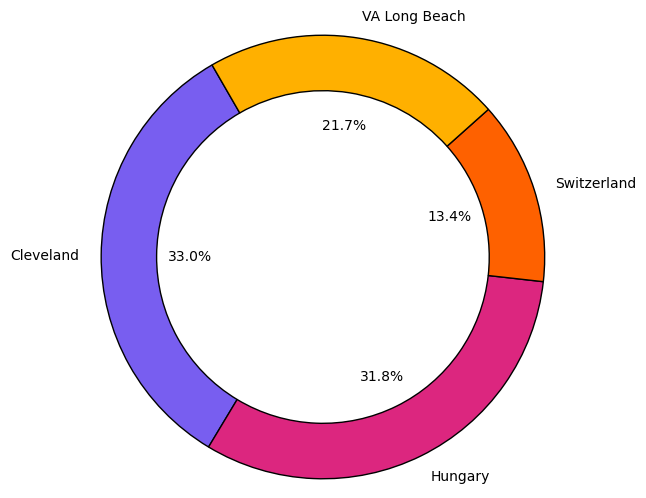

In [25]:
# Creiamo i vari gruppi di appartenenza dei pazienti
origin_count = df.groupby('dataset').size()

# Creiamo il grafico a torta
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(origin_count.values, labels=origin_count.index, autopct='%1.1f%%', startangle=120, colors=f_cls,
                                  wedgeprops=dict(width=0.3, edgecolor='black'), radius=1.2)

# Personalizza il grafico
plt.setp(autotexts, size=10)

# Mostra il grafico
plt.show()

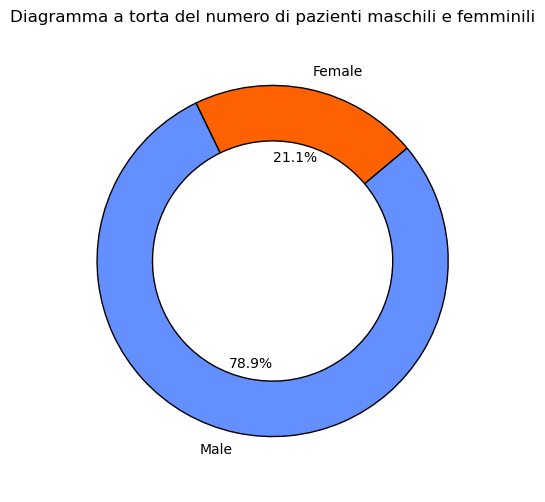

In [26]:
# Creiamo la suddivisione dei gruppi per sesso dei pazienti
sex_count = df.groupby('sex').size()

# Crea il grafico a torta
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sex_count.values, labels=sex_count.index, autopct='%1.1f%%', startangle=40, colors=t_cls,
                                  wedgeprops=dict(width=0.3, edgecolor='black'), radius=0.95)

plt.title("Diagramma a torta del numero di pazienti maschili e femminili")
# Personalizza il grafico
plt.setp(autotexts, size=10)

# Mostra il grafico
plt.show()

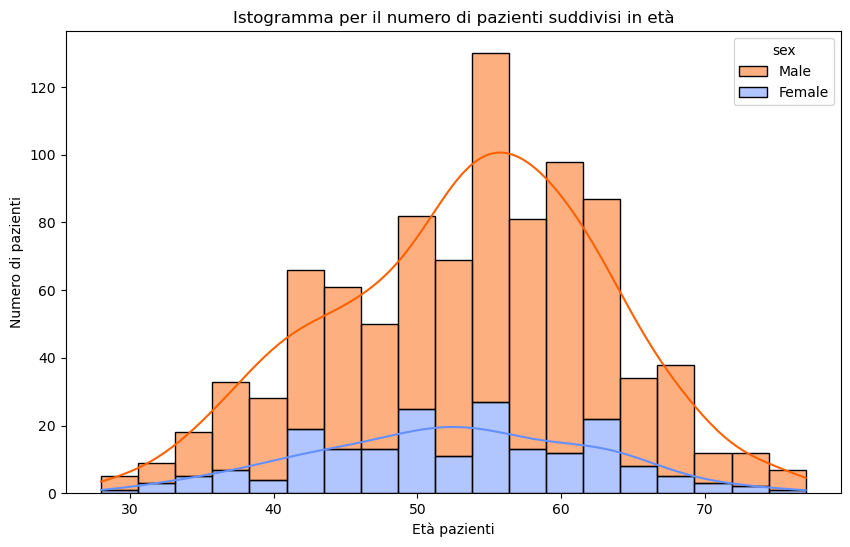

In [28]:
# istogramma per relazione tra il numero di pazienti per età, suddivisi per sesso

histplot = sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette=t_cls, kde=True)

# Impostiamo le etichette degli assi
histplot.set_xlabel("Età pazienti")
histplot.set_ylabel("Numero di pazienti")

# Impostiamo il titolo del grafico
histplot.set_title('Istogramma per il numero di pazienti suddivisi in età')

# Mostriamo il grafico
plt.show()

/Users/macbook20/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: barh() got multiple values for argument 'width'

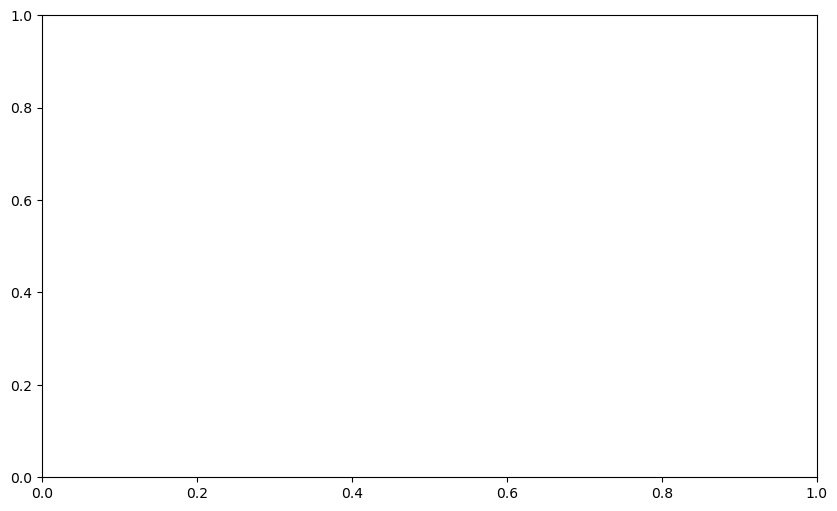

In [29]:
sns.barplot(df['num'].value_counts(), color='#dc267f', width=0.5)
plt.xlabel('Stadio malattia')
plt.ylabel('Numero di pazienti')
plt.show()

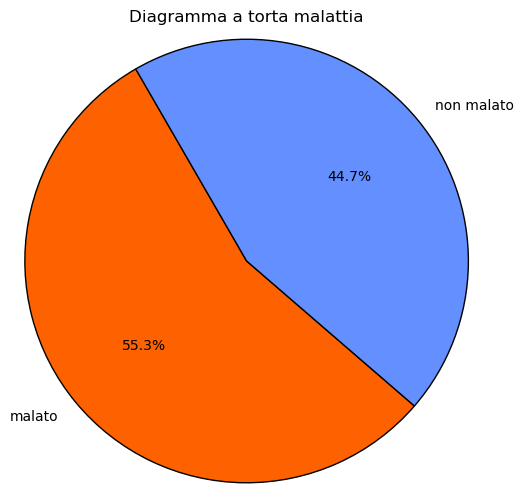

In [33]:
origin_count = df.groupby('group').size()

# Crea il grafico a torta
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(origin_count.values, labels=origin_count.index, autopct='%1.1f%%', startangle=120,
                                  wedgeprops=dict(edgecolor='black'), radius=1.2, colors=t_cls)

plt.title("Diagramma a torta malattia")
# Personalizza il grafico
plt.setp(autotexts, size=10)

# Mostra il grafico
plt.show()

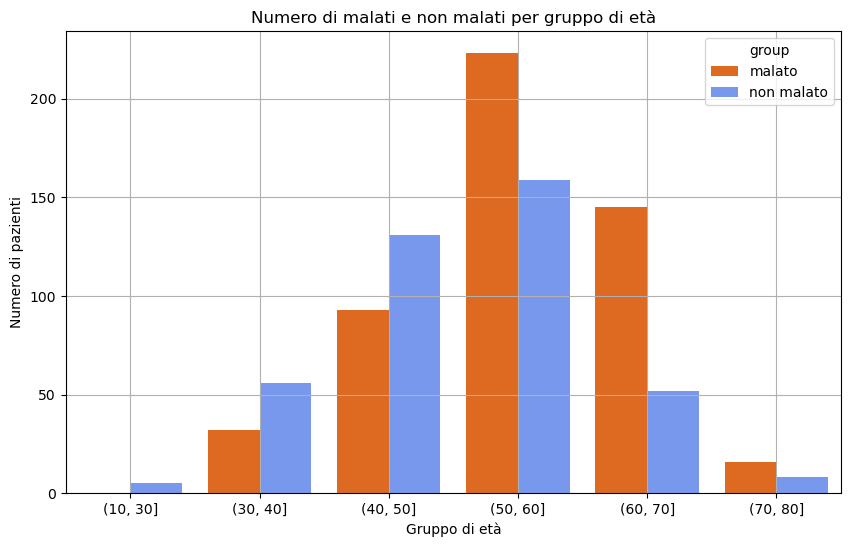

In [31]:
# Aggiungiamo un attributo per differenziare i non malati (num = 0, assenza mallattia al cuore) e 
#i malati (num != 1, poichè rappresentano vari stadi della malattia al cuore)
df['group'] = df['num'].apply(lambda x: 'non malato' if x == 0 else 'malato')

age_bins = [10, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Contiamo il numero di malati e non malati in ciascun intervallo di età
age_group_counts = pd.crosstab(df['age_group'], df['group'])

# Resettiamo l'indice per facilitare la creazione del grafico
age_group_counts = age_group_counts.reset_index()

# Creiamo il grafico a barre
age_group_counts_melted = age_group_counts.melt(id_vars='age_group', value_vars=['malato', 'non malato'],
                                                var_name='group', value_name='count')

barplot = sns.barplot(data=age_group_counts_melted, x='age_group', y='count', hue='group',
                      palette=t_cls)

# Impostiamo le etichette degli assi
barplot.set_xlabel("Gruppo di età")
barplot.set_ylabel("Numero di pazienti")

plt.grid(True)
# Impostiamo il titolo del grafico
barplot.set_title('Numero di malati e non malati per gruppo di età')

# Mostriamo il grafico
plt.show()

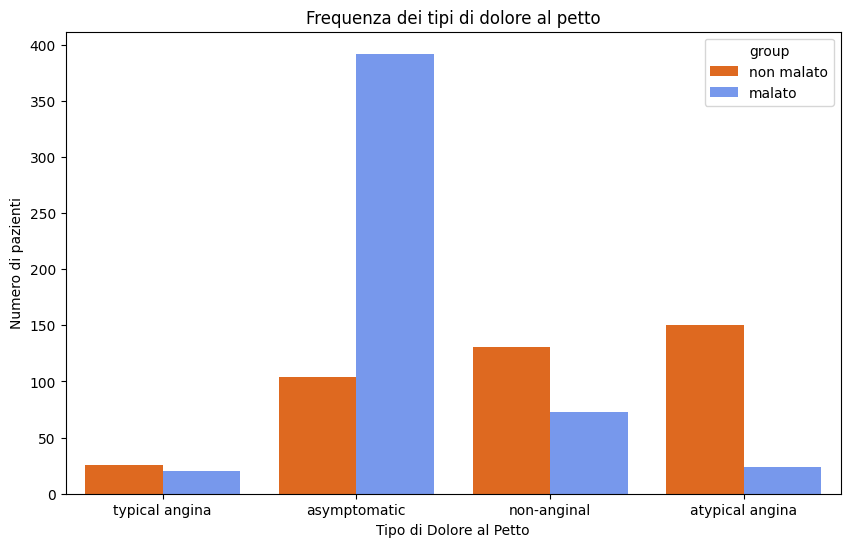

In [8]:
# Grafico a barre per il tipo di dolore al petto, suddivisi per malato e non malato
sns.countplot(x='cp', hue='group', data=df, palette=t_cls)

plt.title('Frequenza dei tipi di dolore al petto')
plt.xlabel('Tipo di Dolore al Petto')
plt.ylabel('Numero di pazienti')
plt.show()

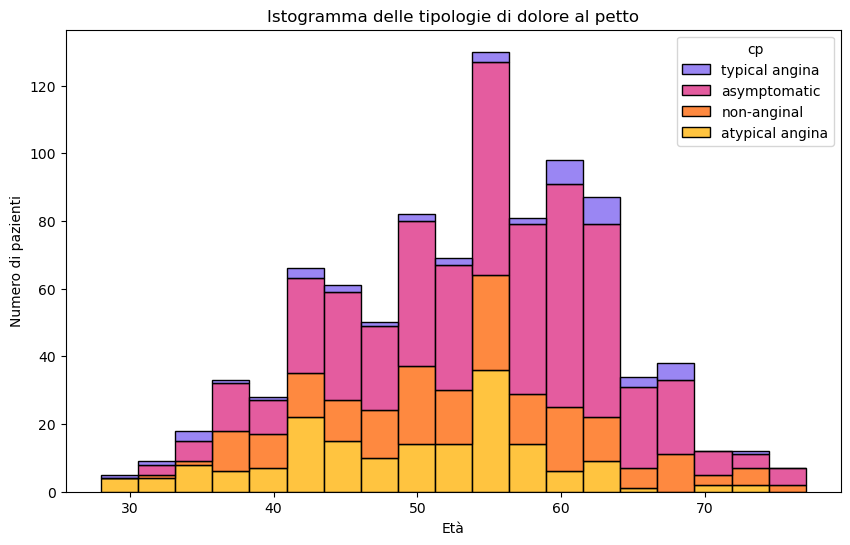

In [35]:
# Istogramma per le varie tipologie di dolori al petto
sns.histplot(data=df, x='age', hue='cp', multiple='stack', palette=f_cls)

plt.xlabel('Età')
plt.ylabel('Numero di pazienti')
plt.title('Istogramma delle tipologie di dolore al petto')
plt.show()

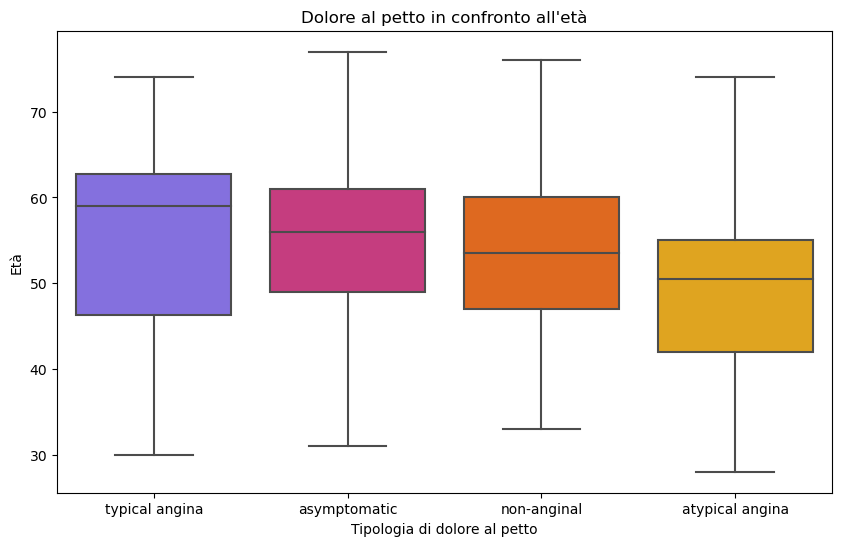

In [37]:
#Box plot di ciascuna tipologia di dolore al petto per età
sns.boxplot(x='cp', y='age', data=df, palette=f_cls)

plt.xlabel('Tipologia di dolore al petto')
plt.ylabel('Età')
plt.title("Dolore al petto in confronto all'età")
plt.show()

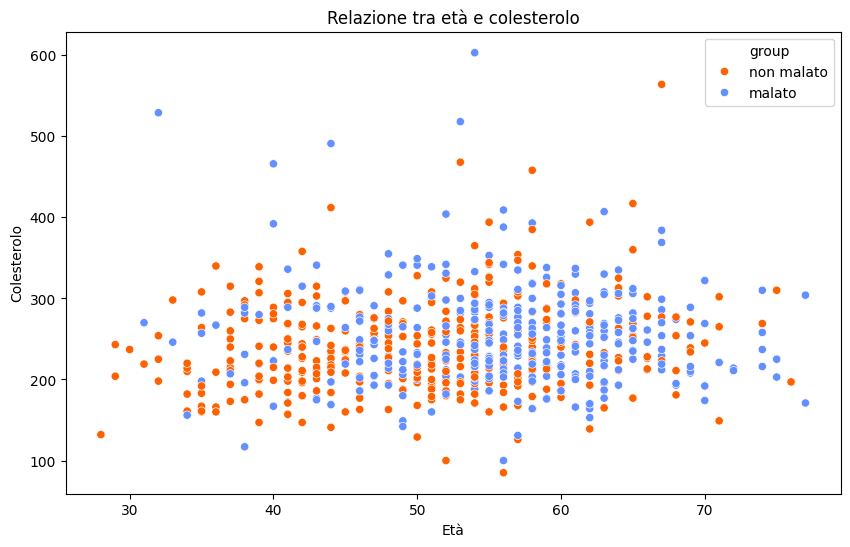

In [10]:
# Filtriamo i valori nulli
df_senza = df[df['chol'] != 0]

# Scatterplot per vedere se c'è una relazione, suddividendo per malato e non malato
sns.scatterplot(x='age', y='chol', hue='group', data=df_senza, palette=t_cls)

plt.title('Relazione tra età e colesterolo')
plt.xlabel('Età')
plt.ylabel('Colesterolo')
plt.show()

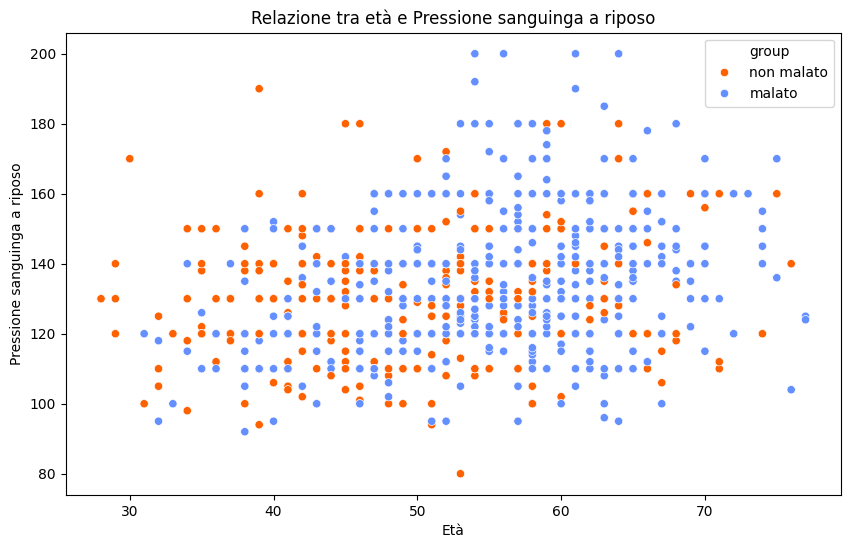

In [11]:
# Filtriamo i valori nulli
df_senza = df[df['trestbps'] != 0]

# Scatterplot per vedere se c'è una relazione, suddividendo per malato e non malato
sns.scatterplot(x='age', y='trestbps', hue='group', data=df_senza, palette=t_cls)

plt.title('Relazione tra età e Pressione sanguinga a riposo')
plt.xlabel('Età')
plt.ylabel('Pressione sanguinga a riposo')
plt.show()

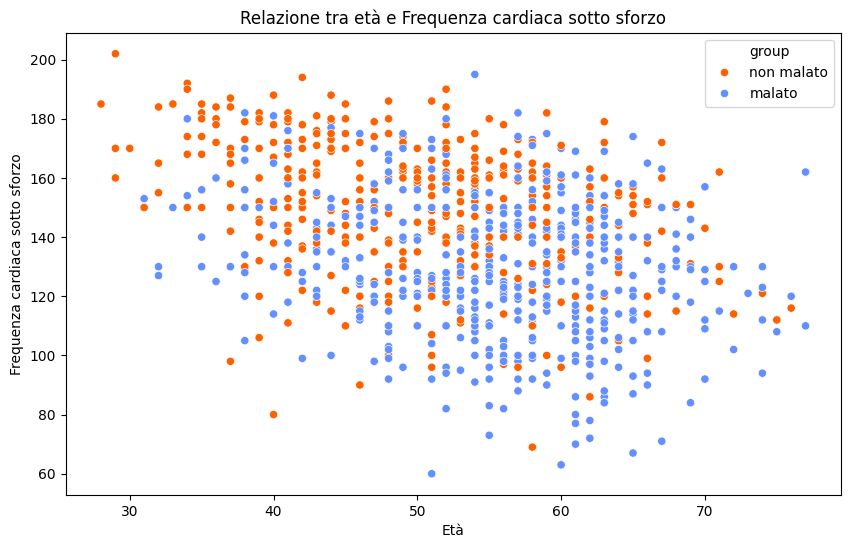

In [12]:
# Filtriamo i valori nulli
df_senza = df[df['thalch'] != 0]

# Creiamo lo scatterplot per vedere se c'è una relazione, suddividendo per malato e non malato
sns.scatterplot(x='age', y='thalch', hue='group', data=df_senza, palette=t_cls)

plt.title('Relazione tra età e Frequenza cardiaca sotto sforzo')
plt.xlabel('Età')
plt.ylabel('Frequenza cardiaca sotto sforzo')
plt.show()

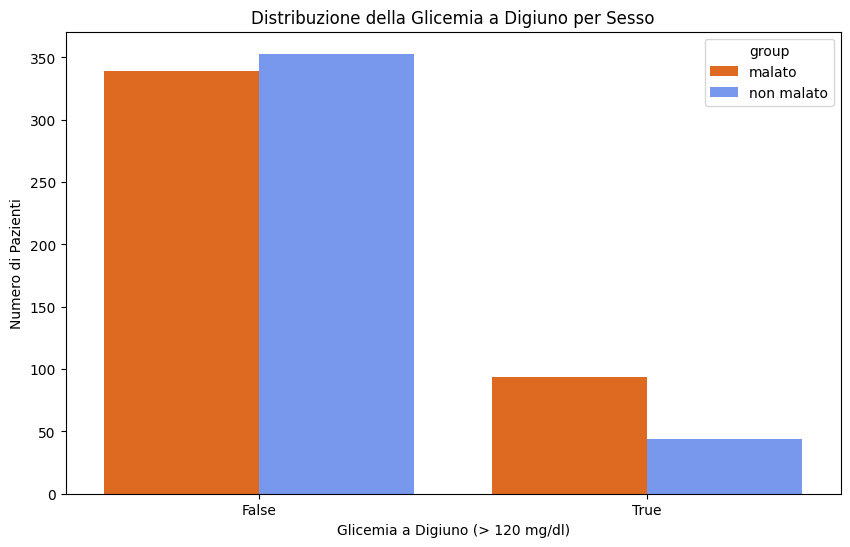

In [13]:
# Controlliamo la distribuzione della glicemia a digiuno (fbs), suddivisi per malato e non malato
bar_plot = sns.countplot(x='fbs', hue='group', data=df, palette=t_cls)

# Impostiamo le etichette degli assi
bar_plot.set_xlabel("Glicemia a Digiuno (> 120 mg/dl)")
bar_plot.set_ylabel("Numero di Pazienti")

bar_plot.set_title("Distribuzione della Glicemia a Digiuno per Sesso")

# Mostriamo il grafico
plt.show()

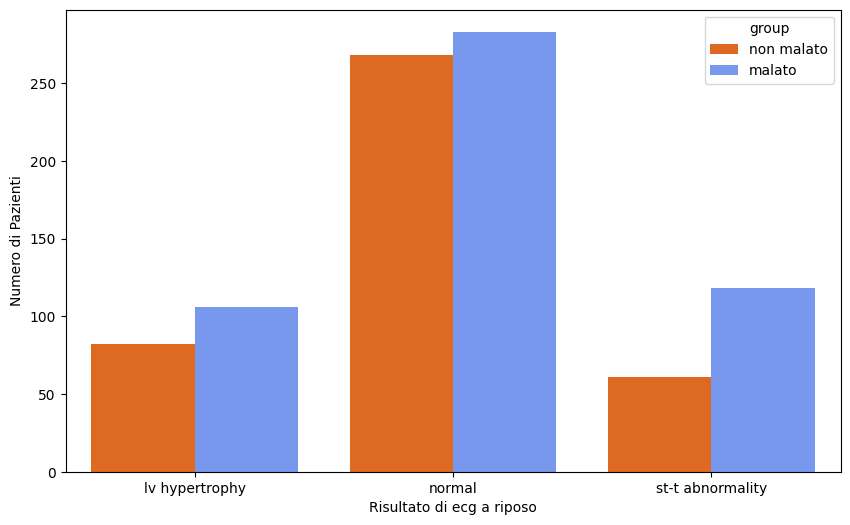

In [19]:
# Istogramma della distribuzione dei risultati dell'elettrocardiogramma (ECG)
bar_plot = sns.countplot(x='restecg', hue='group', data=df, palette=t_cls)

# Impostiamo le etichette degli assi
bar_plot.set_xlabel("Risultato di ecg a riposo")
bar_plot.set_ylabel("Numero di Pazienti")

# Impostiamo il titolo del grafico
bar_plot.set_title("Distribuzione dei risultati dell'elettrocardiogramma (ECG)")

# Mostriamo il grafico
plt.show()

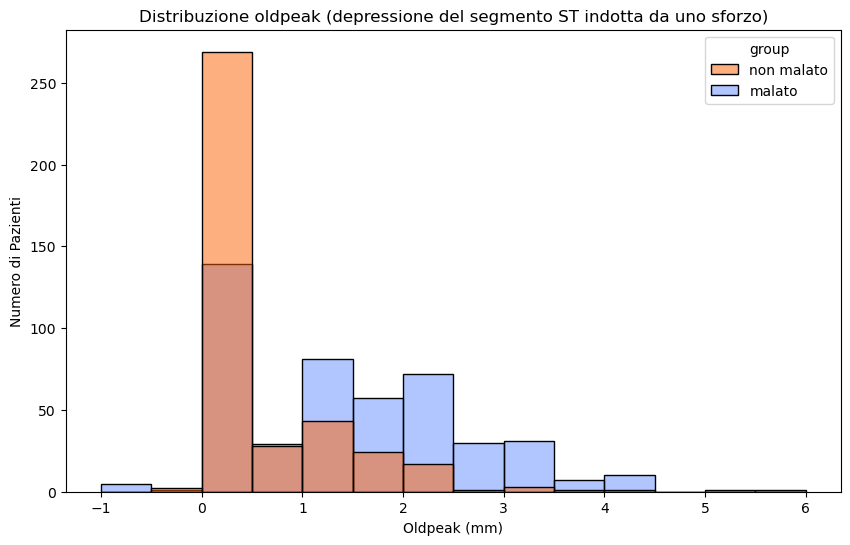

In [38]:
#Istogramma per la distribuzione dell'attributo oldpeak 
bar_plot = sns.histplot(x='oldpeak', hue='group', data=df, palette=t_cls, bins=np.arange(-1, 6.1, .5))

bar_plot.set_xlabel("Oldpeak (mm)")
bar_plot.set_ylabel("Numero di Pazienti")

bar_plot.set_title("Distribuzione oldpeak (depressione del segmento ST indotta da uno sforzo)")

plt.show()